In [1]:
import requests
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import io   
import re
from datetime import datetime
import pytz
from lib_func import save_text_from_url
from lib_func import convert_utc_to_edt
from lib_func import convert_forecast_to_df
from lib_func import plot_forecast

#3-day forecast
url_forecast = 'https://services.swpc.noaa.gov/text/3-day-forecast.txt'

#File name
filename_forecast = 'solar_forecast.txt'
'''
dates_txt_to_num = {    'Jan' : 1,
                        'Feb' : 2,
                        'Mar' : 3,
                        'Apr' : 4,
                        "May" : 5,
                        "Jun" : 6,
                        "Jul" : 7,
                        "Aug" : 8,
                        "Sep" : 9,
                        "Oct" : 10,
                        "Nov" : 11,
                        "Dec" : 12
                   }
'''
time_zones = pytz.all_timezones
save_text_from_url(url_forecast, filename_forecast)

File saved as 'solar_forecast.txt'


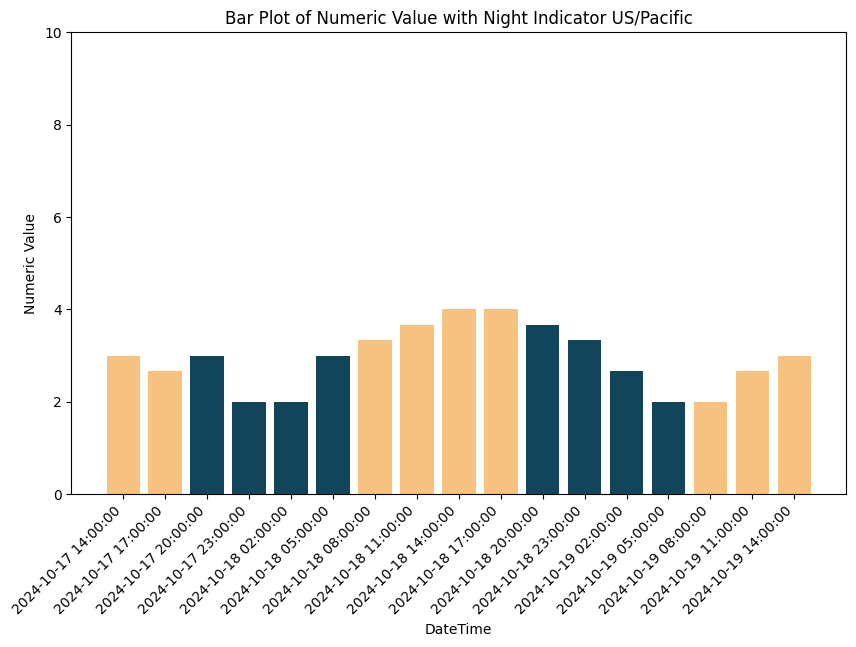

<Figure size 640x480 with 0 Axes>

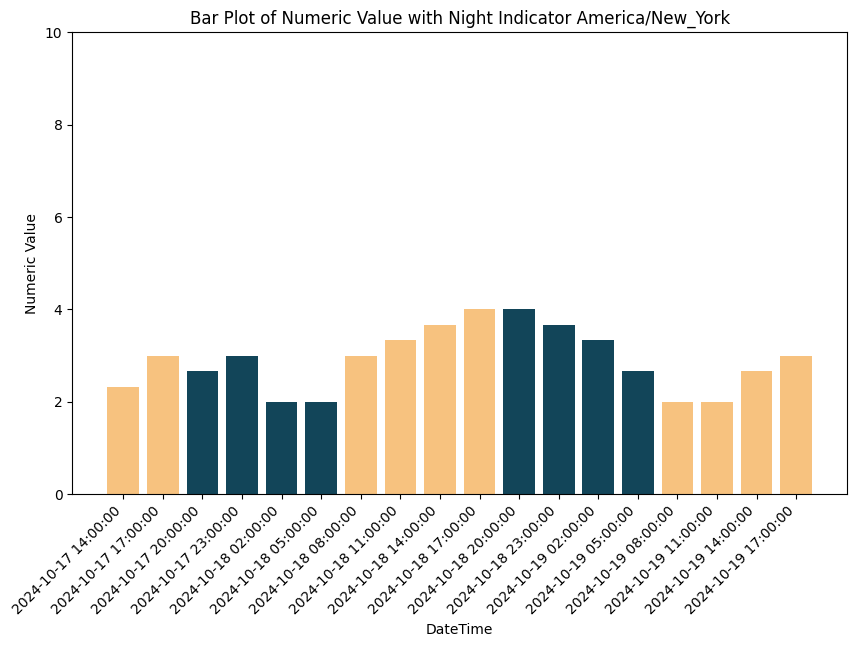

<Figure size 640x480 with 0 Axes>

In [2]:
forecast_df = convert_forecast_to_df(filename_forecast, 'US/Pacific')
plot_forecast(forecast_df, 'US/Pacific' )
forecast_df = convert_forecast_to_df(filename_forecast)
plot_forecast(forecast_df )

<BarContainer object of 18 artists>

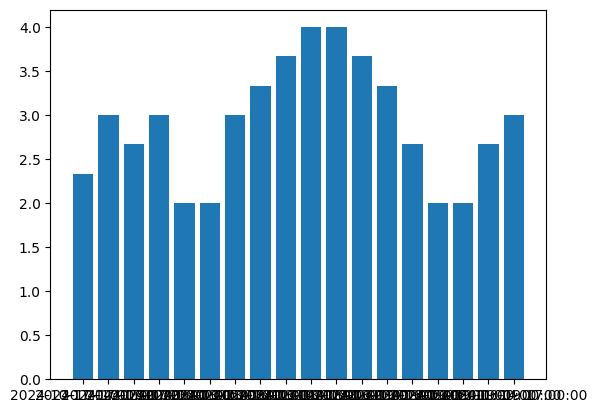

In [3]:
plt.bar(forecast_df['dateTime'].dt.strftime('%Y-%m-%d %H:%M:%S'), forecast_df['numeric_value'])

In [4]:
forecast_df.loc[forecast_df.dateTime > dt.datetime.now()]

,dateTime,value,numeric_value,night
6,2024-10-17 14:00:00,2.33,2.33,False
7,2024-10-17 17:00:00,3.00,3.00,False
8,2024-10-17 20:00:00,2.67,2.67,True
9,2024-10-17 23:00:00,3.00,3.00,True
10,2024-10-18 02:00:00,2.00,2.00,True
11,2024-10-18 05:00:00,2.00,2.00,True
12,2024-10-18 08:00:00,3.00,3.00,False
13,2024-10-18 11:00:00,3.33,3.33,False
14,2024-10-18 14:00:00,3.67,3.67,False
15,2024-10-18 17:00:00,4.00,4.00,False


In [5]:
t_zone = 'America/New_York'


now_tz = dt.datetime.now(pytz.timezone(t_zone))
str(now_tz)

'2024-10-17 12:06:50.677610-04:00'

In [6]:
now_tz = dt.datetime.now()
now_tz

datetime.datetime(2024, 10, 17, 12, 6, 50, 696621)

In [7]:
forecast_df.loc[forecast_df.dateTime > now_tz]

,dateTime,value,numeric_value,night
6,2024-10-17 14:00:00,2.33,2.33,False
7,2024-10-17 17:00:00,3.00,3.00,False
8,2024-10-17 20:00:00,2.67,2.67,True
9,2024-10-17 23:00:00,3.00,3.00,True
10,2024-10-18 02:00:00,2.00,2.00,True
11,2024-10-18 05:00:00,2.00,2.00,True
12,2024-10-18 08:00:00,3.00,3.00,False
13,2024-10-18 11:00:00,3.33,3.33,False
14,2024-10-18 14:00:00,3.67,3.67,False
15,2024-10-18 17:00:00,4.00,4.00,False
